In [1]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import mnist

In [2]:
#x_train =imágenes de entrenamiento (60.000 muestras, cada una de 28x28).

#y_train = etiquetas de esas imágenes (qué dígito es, un número del 0 al 9).

#x_test =imágenes de prueba/testeo (10.000 muestras).

#y_test = etiquetas correspondientes a x_test.


(x_train, y_train), (x_validacion, y_validacion) = mnist.load_data()

print("Tamaño de entrenamiento:", x_train.shape, y_train.shape)
print("Tamaño de prueba:", x_validacion.shape, y_validacion.shape)





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño de entrenamiento: (60000, 28, 28) (60000,)
Tamaño de prueba: (10000, 28, 28) (10000,)


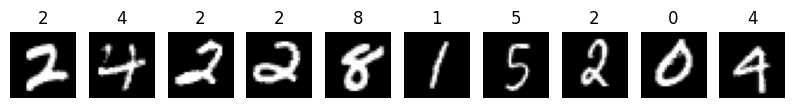

In [3]:
indices = np.random.choice(len(x_validacion), 10, replace=False)

# Graficar las imágenes
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_validacion[idx], cmap="gray")   # Mostrar imagen en escala de grises
    plt.axis("off")
    plt.title(y_validacion[idx])  # Mostrar el dígito real arriba
plt.show()

**Clase normalizar**


Se define la clase que se encarga de normalizar las variables y de eliminar los features con varianza 0, que son los que no traen informacion debido a que el mismo es constante y no sirve para entrenar el modelo

In [4]:
import numpy as np

class normalizar:
    def __init__(self, threshold):
        self.threshold = threshold  # evita dividir por cero

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.var = np.var(X, axis=0)
        # columnas cuya varianza es mayor que el threshold(nuestro 0)
        self.valid_cols = self.var > self.threshold
        self.mean = self.mean[self.valid_cols]
        self.var = self.var[self.valid_cols]

    def transform(self, X):
        # aplicar mask a X también
        X_valid = X[:, self.valid_cols]
        X_norm = (X_valid - self.mean) / np.sqrt(self.var + self.threshold)
        return X_norm

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)





In [5]:

#las imagenes son de 28x28
# Aplanar imágenes
#Cada fila es una imagen y cada columna es un pixel.

X_train_2 = x_train.reshape(x_train.shape[0], -1)
X_validacion_2 = x_validacion.reshape(x_validacion.shape[0], -1)

#divido por 2 y transformo a entero para que sean 0 o 1, 0 = par , 1= impar

y_train_paridad = (y_train %2).astype(int)
y_validacion_paridad = (y_validacion % 2).astype(int)

#inicializo el normalizador
normalizador = normalizar(1e-8)

#entreno y transformo
X_train_norm = normalizador.fit_transform(X_train_2)

#solo transformo(normalizo) la validacion
X_validacion_norm = normalizador.transform(X_validacion_2)

print("Antes de normalizar:")
print(np.mean(X_train_2) , np.std(X_train_2))
print(np.mean(X_validacion_2) , np.std(X_validacion_2))

print("\nDespués de normalizar:")
print("train")
print(np.mean(X_train_norm) , np.std(X_train_norm))
print("validacion")
print(np.mean(X_validacion_norm) , np.std(X_validacion_norm))





Antes de normalizar:
33.318421449829934 78.56748998339798
33.791224489795916 79.17246322228644

Después de normalizar:
train
-8.19221750202254e-20 0.9999999792305988
validacion
0.0027222130331651146 1.0007860945910805


Item C:

**Inversa:**

La funcion sigmoide cumple con la siguiente ecuacion:
$$
p = \sigma(z) = \frac{1}{1 + e^{-z}}
$$
De donde se parte para el calculo de la inversa:
$$
e^{-z} = \frac{1-p}{p} →z = log(\frac{p}{1-p})
$$


**Derivada:**

Partimos de:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Su derivada es:

$$
\sigma'(z) = -\left( \frac{1}{(1 + e^{-z})^2} \right)(-e^{-z})
$$

Lo que se puede reordenar como:

$$
\sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

Finalmente, usando la definición de p, se obtiene:

$$
\sigma'(z) = p(1 - p)
$$


### Regresión logística binaria: costo y gradiente

Partiendo del modelo:
$$
\sigma(z)=\frac{1}{1+e^{-z}}, \qquad z=w^\top x+b
$$

Para clasificación binaria, la pérdida de entropía cruzada para un solo ejemplo es:

$$
\ell^{(i)}(w,b)=-\Big[y^{(i)}\log\big(\sigma(z^{(i)})\big)+(1-y^{(i)})\log\big(1-\sigma(z^{(i)})\big)\Big]
$$

Promediando sobre \(N\) ejemplos:

$$
J(w,b)=-\frac{1}{N}\sum_{i=1}^N\Big[y^{(i)}\log\big(\sigma(z^{(i)})\big)+(1-y^{(i)})\log\big(1-\sigma(z^{(i)})\big)\Big]
$$


Usamos $$\sigma'(z)=\sigma(z)(1-\sigma(z))$$ y la regla de la cadena:

$$
\frac{\partial \ell^{(i)}}{\partial z^{(i)}}=\sigma(z^{(i)})-y^{(i)}
$$



#### Gradiente respecto a \(w\) y \(b\)

Para cada ejemplo:

$$
\frac{\partial \ell^{(i)}}{\partial w}=(\sigma(z^{(i)})-y^{(i)})\,x^{(i)},\qquad
\frac{\partial \ell^{(i)}}{\partial b}=\sigma(z^{(i)})-y^{(i)}
$$

Promediando sobre \(N\) ejemplos y escribiendo en forma vectorizada:

$$
\frac{\partial J}{\partial w}=\frac{1}{N}X^\top\big(\sigma(Xw+b)-y\big)
$$

$$
\frac{\partial J}{\partial b}=\frac{1}{N}\mathbf{1}^\top\big(\sigma(Xw+b)-y\big)
$$




In [6]:
class RegresionLogistica:

  def __init__(self , learning_rate , iteraciones):
    self.learning_rate = learning_rate
    self.iteraciones = iteraciones
    self.w = None
    self.b = None
    self.loss_history = []


  def predict_proba(self, X):
    z = np.dot(X, self.w) + self.b
    p = 1 / (1 + np.exp(-z))  # función sigmoide para transformar en probabilidad
    return p

  def predict(self, X, threshold):
    p = self.predict_proba(X)
    y_pred = (p >= threshold).astype(int)#si la proba da mas que threshold es 1 sino 0
    return y_pred

  def fit(self, X, y):
    #inicializo en 0 los vectores
    N , W = X.shape
    self.w = np.zeros(W)
    self.b = 0
    for _ in range(self.iteraciones):
        # Paso 1: calcular predicciones
        p = self.predict_proba(X)
        # Paso 2: calcular error
        error = p - y
        # Paso 3: calcular gradientes
        grad_w = (1/N) * np.dot(X.T, error)
        grad_b = (1/N) * np.sum(error)
        # Paso 4: actualizar parámetros
        self.w -= self.learning_rate * grad_w
        self.b -= self.learning_rate * grad_b
         # calcular y guardar pérdida
        loss = self.cross_entropy_loss(y, p)
        self.loss_history.append(loss)


  def accuracy(self, y_pred, y_true):
    accuracy = np.mean(y_true == y_pred) # te devuelve la proporcion de aciertos
    return accuracy

  def cross_entropy_loss(self, y_true, p_pred): #La entropía cruzada mide cuánta sorpresa genera tu modelo respecto a la distribución verdadera
    epsilon = 1e-15
    y_pred = np.clip(p_pred, epsilon, 1 - epsilon)
    lossv = -np.mean(y_true * np.log(p_pred) + (1 - y_true) * np.log(1 - p_pred))
    return lossv



acuracy:  0.9003
Entropía cruzada validacion: 0.25649528408777905
Entropía cruzada entrenamiento: 0.2525732009409168


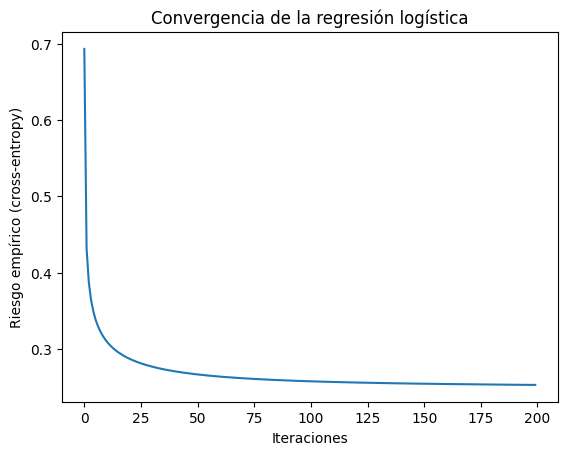

In [7]:
#defino el regresor
regresor = RegresionLogistica(learning_rate = 0.15 , iteraciones = 200)

#entreno
regresor.fit(X_train_norm, y_train_paridad)

#predigo
y_predict = regresor.predict(X_validacion_norm , 0.5)

print("acuracy: ", regresor.accuracy(y_predict, y_validacion_paridad))

entropia_cruzada_validacion = regresor.cross_entropy_loss(y_validacion_paridad, regresor.predict_proba(X_validacion_norm))
print("Entropía cruzada validacion:", entropia_cruzada_validacion)

entropia_cruzada_entrenamiento = regresor.cross_entropy_loss(y_train_paridad, regresor.predict_proba(X_train_norm))
print("Entropía cruzada entrenamiento:", entropia_cruzada_entrenamiento)


plt.plot(regresor.loss_history)
plt.xlabel("Iteraciones")
plt.ylabel("Riesgo empírico (cross-entropy)")
plt.title("Convergencia de la regresión logística")
plt.show()

### Entropía cruzada y su evolución durante el entrenamiento

La **entropía cruzada** es una medida de qué tan bien las probabilidades que predice el modelo coinciden con las etiquetas reales.  

- Si para un caso positivo (\(y=1\)) el modelo da \(p\) cercano a 1, el término es casi 0 (sin “sorpresa”).  
- Si para un caso negativo (\(y=0\)) el modelo da \(p\) cercano a 0, también es casi 0.  
- En cambio, si el modelo se equivoca (por ejemplo predice \(p=0.1\) para un positivo), el término es grande.

Por eso, **valores altos de entropía cruzada indican predicciones malas o poco seguras**, mientras que **valores bajos indican que las probabilidades predichas son consistentes con las etiquetas reales**.

Durante el entrenamiento con gradiente descendente, los parámetros del modelo se van ajustando para que:
- Los positivos tengan \(p_i\) cada vez más cerca de 1.
- Los negativos tengan \(p_i\) cada vez más cerca de 0.

Esto hace que la entropía cruzada **vaya disminuyendo con las iteraciones**, mostrando que el modelo está aprendiendo y mejorando sus predicciones.  
Cuando la curva se estabiliza, significa que el modelo llegó a un mínimo y dejó de mejorar.


AUC: -0.9606597829188509


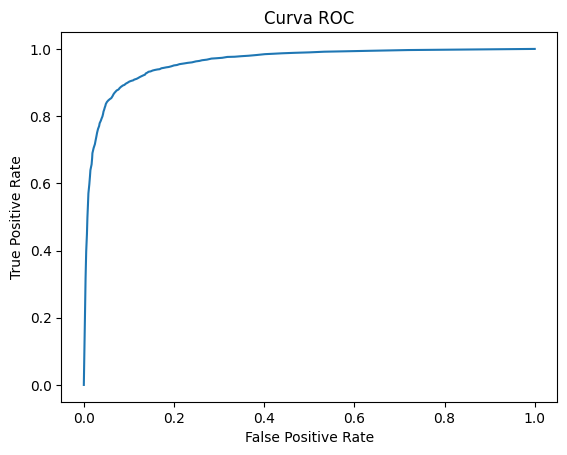

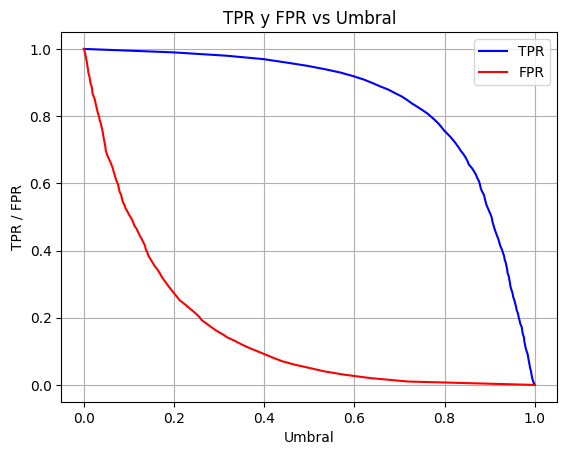

In [8]:
#Curva ROC

p = regresor.predict_proba(X_validacion_norm)

umbrales = np.linspace(0,1,100)
tpr = []
fpr = []

for i in umbrales:
  y_predict = regresor.predict(X_validacion_norm , i)
  #analizo todos los casos posibles para hacer la roc
  tp = np.sum((y_predict == 1) & (y_validacion_paridad == 1))
  tn = np.sum((y_predict == 0) & (y_validacion_paridad == 0))
  fp = np.sum((y_predict == 1) & (y_validacion_paridad == 0))
  fn = np.sum((y_predict == 0) & (y_validacion_paridad == 1))
  tpr.append(tp / (tp + fn)) #posivos predecidos/todos los positivos
  fpr.append(fp / (fp + tn))#predijiste positivos y eran negativos / mismos + los que dijiste que eran 0 y lo eran efectivamente

#integro el area bajo la curva
auc = np.trapezoid(tpr, fpr)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.show()


plt.plot(tpr, umbrales, color='blue', label='TPR')  # azul para TPR
plt.plot(fpr, umbrales, color='red', label='FPR')   # rojo para FPR
plt.xlabel('Umbral')
plt.ylabel('TPR / FPR')
plt.title('TPR y FPR vs Umbral')
plt.legend()  # muestra la leyenda con los nombres al lado de los colores
plt.grid(True)
plt.show()
#


Al subir el umbral, el modelo solo clasifica como positivo los casos con score más alto. Esto hace que los positivos detectados sean más confiables, pero detecta menos positivos en total, por lo que la TPR disminuye ligeramente. Al mismo tiempo, menos negativos se clasifican erróneamente como positivos, así que la FPR también disminuye. En la curva ROC, esto se traduce en un desplazamiento hacia la izquierda y un ligero descenso de la curva en la TPR.